Dataset contains 426880 rows and 18 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  sta

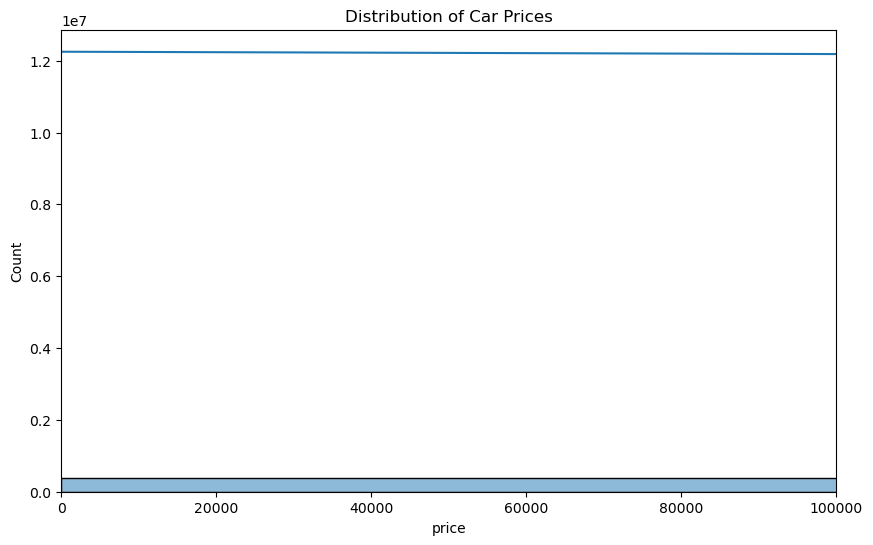

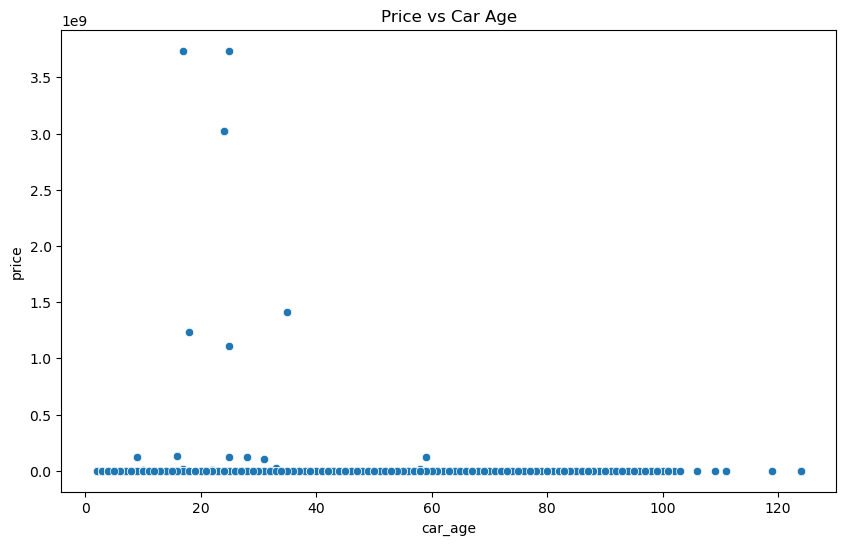

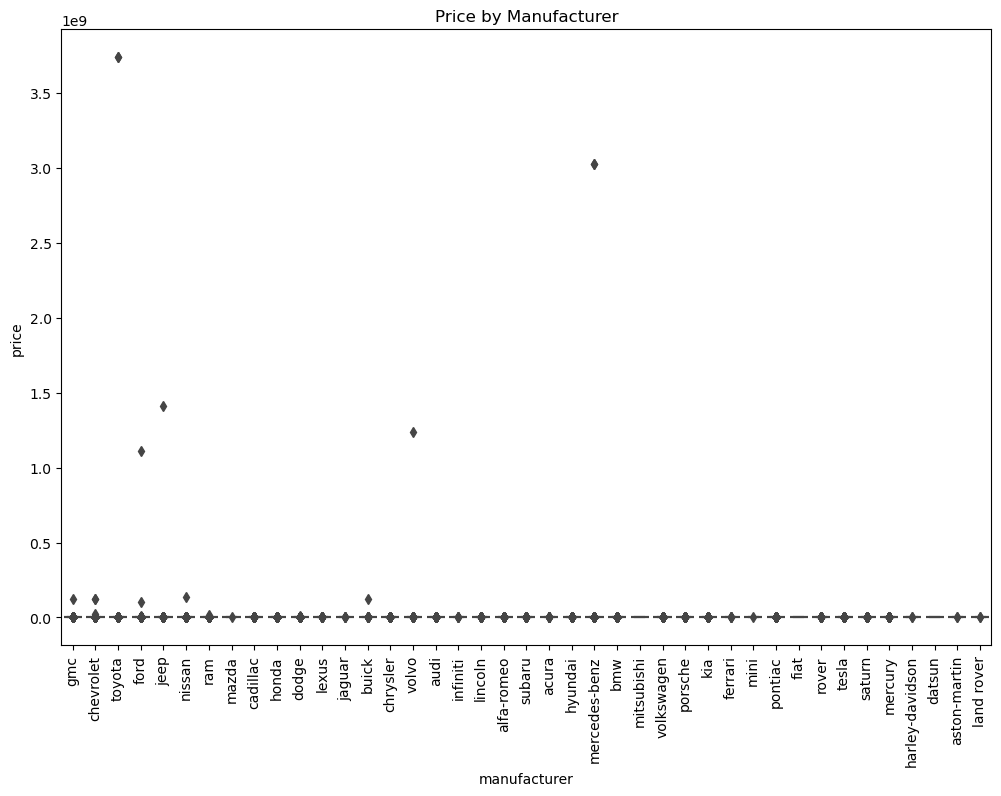

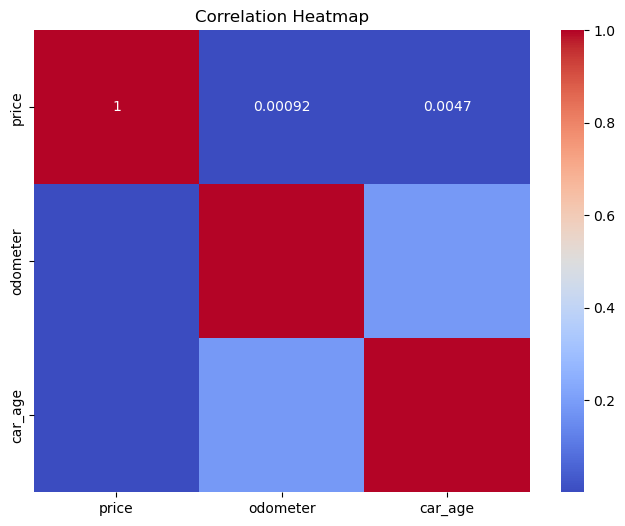

Mean Absolute Error: 82654.13206119019
R2 Score: 3.423614074160586e-05


In [10]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('/Users/nandinichouta/Downloads/practical_application_II_starter/data/vehicles.csv')

# Display the first few rows
df.head()
# Check the size of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
df.isnull().sum()

# Summary of the dataset
df.describe()

# Information about the dataset
df.info()
# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop rows where price is missing or zero
df = df[df['price'] > 0]

# Handle missing values (simple example: remove rows with missing data in important columns)
df = df.dropna(subset=['year', 'manufacturer', 'model', 'odometer'])

# Convert 'year' to an integer
df['year'] = df['year'].astype(int)
# Create a new column for car age
current_year = 2024
df['car_age'] = current_year - df['year']

# Simplify conditions by converting them to ordered categories
condition_order = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage']
df['condition'] = pd.Categorical(df['condition'], categories=condition_order, ordered=True)
# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlim(0, 100000)  # Optional, limit the x-axis to remove extreme outliers
plt.show()
# Scatter plot of price vs car age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_age', y='price', data=df)
plt.title('Price vs Car Age')
plt.show()
# Boxplot of price by manufacturer
plt.figure(figsize=(12, 8))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.title('Price by Manufacturer')
plt.xticks(rotation=90)
plt.show()
# Correlation matrix
corr_matrix = df[['price', 'odometer', 'car_age']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Define features and target
X = df[['car_age', 'odometer']]  # You can add more features later
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')